In [1]:
library(tidyverse)
library(magrittr)
library(purrr) 
library(glue) 
library(stringr) 

library(rvest) 
library(polite)
library(xml2) 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




In [2]:
all_region_fire_incident <- read_html('https://www.fireandemergency.nz/incidents-and-news/incident-reports/')

In [3]:
north_region_href <- all_region_fire_incident %>%
   html_nodes('div.incidentreport__region:nth-child(6) .region .region__link') %>%
   html_attr('href') 
north_region_href

[1] "/incidents-and-news/incident-reports/incidents?region=1&day=Thursday" 
[2] "/incidents-and-news/incident-reports/incidents?region=1&day=Wednesday"
[3] "/incidents-and-news/incident-reports/incidents?region=1&day=Tuesday"  
[4] "/incidents-and-news/incident-reports/incidents?region=1&day=Monday"   
[5] "/incidents-and-news/incident-reports/incidents?region=1&day=Sunday"   
[6] "/incidents-and-news/incident-reports/incidents?region=1&day=Saturday" 
[7] "/incidents-and-news/incident-reports/incidents?region=1&day=Friday"

In [4]:
central_region_href <- all_region_fire_incident %>%
   html_nodes('div.incidentreport__region:nth-child(7) .region .region__link') %>%
   html_attr('href') 
central_region_href

[1] "/incidents-and-news/incident-reports/incidents?region=2&day=Thursday" 
[2] "/incidents-and-news/incident-reports/incidents?region=2&day=Wednesday"
[3] "/incidents-and-news/incident-reports/incidents?region=2&day=Tuesday"  
[4] "/incidents-and-news/incident-reports/incidents?region=2&day=Monday"   
[5] "/incidents-and-news/incident-reports/incidents?region=2&day=Sunday"   
[6] "/incidents-and-news/incident-reports/incidents?region=2&day=Saturday" 
[7] "/incidents-and-news/incident-reports/incidents?region=2&day=Friday"

In [5]:
south_region_href <- all_region_fire_incident %>%
   html_nodes('div.incidentreport__region:nth-child(8) .region .region__link') %>%
   html_attr('href') 
south_region_href

[1] "/incidents-and-news/incident-reports/incidents?region=3&day=Thursday" 
[2] "/incidents-and-news/incident-reports/incidents?region=3&day=Wednesday"
[3] "/incidents-and-news/incident-reports/incidents?region=3&day=Tuesday"  
[4] "/incidents-and-news/incident-reports/incidents?region=3&day=Monday"   
[5] "/incidents-and-news/incident-reports/incidents?region=3&day=Sunday"   
[6] "/incidents-and-news/incident-reports/incidents?region=3&day=Saturday" 
[7] "/incidents-and-news/incident-reports/incidents?region=3&day=Friday"

In [6]:
all_region_href <- tibble(North = north_region_href, Central = central_region_href, South = south_region_href)
all_region_href

North,Central,South
<chr>,<chr>,<chr>
/incidents-and-news/incident-reports/incidents?region=1&day=Thursday,/incidents-and-news/incident-reports/incidents?region=2&day=Thursday,/incidents-and-news/incident-reports/incidents?region=3&day=Thursday
/incidents-and-news/incident-reports/incidents?region=1&day=Wednesday,/incidents-and-news/incident-reports/incidents?region=2&day=Wednesday,/incidents-and-news/incident-reports/incidents?region=3&day=Wednesday
/incidents-and-news/incident-reports/incidents?region=1&day=Tuesday,/incidents-and-news/incident-reports/incidents?region=2&day=Tuesday,/incidents-and-news/incident-reports/incidents?region=3&day=Tuesday
/incidents-and-news/incident-reports/incidents?region=1&day=Monday,/incidents-and-news/incident-reports/incidents?region=2&day=Monday,/incidents-and-news/incident-reports/incidents?region=3&day=Monday
/incidents-and-news/incident-reports/incidents?region=1&day=Sunday,/incidents-and-news/incident-reports/incidents?region=2&day=Sunday,/incidents-and-news/incident-reports/incidents?region=3&day=Sunday
/incidents-and-news/incident-reports/incidents?region=1&day=Saturday,/incidents-and-news/incident-reports/incidents?region=2&day=Saturday,/incidents-and-news/incident-reports/incidents?region=3&day=Saturday
/incidents-and-news/incident-reports/incidents?region=1&day=Friday,/incidents-and-news/incident-reports/incidents?region=2&day=Friday,/incidents-and-news/incident-reports/incidents?region=3&day=Friday


In [7]:
install.packages('xts')
library(xts)

Installing package into ‘/home/christopher/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following objects are masked from ‘package:dplyr’:

    first, last




In [8]:
region_incident_data <- function(href){
    
    region_data <- glue('https://www.fireandemergency.nz{href}#')%>%
                   read_html() %>%
                   html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(2) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                   html_text2()

    region_round_time <- strptime(region_data, "%d/%m/%Y %H:%M:%S")

    for(i in 1:length(region_round_time)){
        region_round_time[i] <- align.time(region_round_time[i], n=60*30
        )

    }
    
    return(region_round_time)
    
    }
    result <- region_incident_data("/incidents-and-news/incident-reports/incidents?region=1&day=Monday#")
    result
                  

 [1] "2022-10-24 00:30:00 NZDT" "2022-10-24 00:30:00 NZDT"
 [3] "2022-10-24 01:00:00 NZDT" "2022-10-24 01:00:00 NZDT"
 [5] "2022-10-24 01:30:00 NZDT" "2022-10-24 01:30:00 NZDT"
 [7] "2022-10-24 02:00:00 NZDT" "2022-10-24 03:00:00 NZDT"
 [9] "2022-10-24 03:00:00 NZDT" "2022-10-24 03:30:00 NZDT"
[11] "2022-10-24 04:00:00 NZDT" "2022-10-24 04:30:00 NZDT"
[13] "2022-10-24 04:30:00 NZDT" "2022-10-24 04:30:00 NZDT"
[15] "2022-10-24 05:30:00 NZDT" "2022-10-24 06:30:00 NZDT"
[17] "2022-10-24 07:30:00 NZDT" "2022-10-24 07:30:00 NZDT"
[19] "2022-10-24 07:30:00 NZDT" "2022-10-24 08:00:00 NZDT"
[21] "2022-10-24 08:00:00 NZDT" "2022-10-24 08:00:00 NZDT"
[23] "2022-10-24 09:00:00 NZDT" "2022-10-24 09:00:00 NZDT"
[25] "2022-10-24 10:00:00 NZDT" "2022-10-24 10:30:00 NZDT"
[27] "2022-10-24 11:00:00 NZDT" "2022-10-24 11:00:00 NZDT"
[29] "2022-10-24 11:30:00 NZDT" "2022-10-24 11:30:00 NZDT"
[31] "2022-10-24 11:30:00 NZDT" "2022-10-24 12:00:00 NZDT"
[33] "2022-10-24 12:00:00 NZDT" "2022-10-24 12:00:00 NZD

In [9]:
# this function return a data frame/tibble which contains all the data scraped from the fire incidents reports data
# this function takes id( characters indicating the region id; 1 being North, 2 being Central and 3 being South) and the day(string indicating the day of interest; e.g. Monday, Tuesday, etc)
region_incident_data <- function(id, day){
    
    region_href <- glue('https://www.fireandemergency.nz/incidents-and-news/incident-reports/incidents?region={id}&day={day}#')%>%
                   read_html() # first here we prepare the url which is the url for the page we want to scrape, then use read_html() function we scrape the data from the webpage and store the data in a variable
    # then from the scraped data which is the result from above code, we tried to categories the data we get and put the data in each category to their own varibale(performed below).


    Incident <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(1) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2()# so here we tried to get the data which tell us about incident number from the scrapped data and store it to variable
    
    Date_and_Time <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(2) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2() #here we tried to get the data which tell us about date and time from the scrapped data and store it to variable

    Date_and_Time <- strptime(Date_and_Time, "%d/%m/%Y %H:%M:%S") #Date and time requires special treatment in our case, since we would like to runf the time to the nearest 30 minute, we have to change the data type from char to dttm(date and time). strptime() function allows us to do that

    # then here we tried to format it to nearest 30 minutes, we do it by looping through the date and time column
    for(i in 1:length(Date_and_Time)){
        Date_and_Time[i] <- align.time(Date_and_Time[i], n=60*30 # then by using align.time() function we make the time to nearest 30 minutes
        )

    }
    

    Location <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(3) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2() #here we tried to get the data which tell us about location from the scrapped data and store it to variable
    
    Duration <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(4) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2() #here we tried to get the data which tell us about duration from the scrapped data and store it to variable
    
    Station <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(5) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2() #here we tried to get the data which tell us about fire station from the scrapped data and store it to variable
    
    Result <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(6) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2() #here we tried to get the data which tell us about result(which has result description and result code) from the scrapped data and store it to variable
    
    # then a new tibble is created which consist all data we get from code above in different columns
    region_incident_table <- tibble(Incident_no = Incident, Date_and_Time = Date_and_Time, Location = Location, Duration = Duration, Station = Station, Result = Result)
    
    return(region_incident_table)
    
    }

format:
{region}_{day}_data

## Merge all dataframe from Monday to Sunday into sngle one data frame

In [10]:
# this function return a tibble which consist of all fire incidents report in a certain region from one week ago from the current date
 # this function take one parameter which is region( a number in form of string which indicates what region we want to get the data from )
get_week_data <- function(region) {
    result_tibble <- tibble( # here we prepare the tibble, this tiblle is now empty but it will later be filled with data of fire incidents report in each day
        Incident_no = character(),
        Date_and_Time = date(),
        Location = character(),
        Duration= character(),
        Station = character(),
        Result = character()
    )
    temp <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday") 
    for(i in temp){
        result_tibble <- rbind(result_tibble, region_incident_data(region, i)) # here we loop through the day vectors which we prepare above, then using the region_incident_data() function we defined in previous section to fetch the fire incidents data for each day, then using rbind() function we can apppend the result_tiblle with each tibble we get from calling the region_incident_data() function
    }
    
    return(result_tibble) 
}

# so let say I want to get the a week data of fire incidents report  in central region
# I can just call the get_week_data() function and specify the parameter to "2"
the_tibble <- get_week_data("2")
the_tibble

Incident_no,Date_and_Time,Location,Duration,Station,Result
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>
F3583940,2022-10-24 00:30:00,KELVIN GROVE PALMERSTON NORTH CITY,00:00:00,Milson,
F3583946,2022-10-24 01:00:00,KELVIN GROVE PALMERSTON NORTH CITY,00:00:00,Palmerston North,
F3583952,2022-10-24 01:30:00,SPOTSWOOD NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,
F3583958,2022-10-24 01:30:00,ELGIN GISBORNE DISTRICT,00:00:00,Gisborne,
F3583962,2022-10-24 02:00:00,RAUMATI BEACH KAPITI COAST DISTRICT,00:00:00,Paraparaumu,
F3583970,2022-10-24 03:30:00,KAIRANGA MANAWATU DISTRICT,00:00:00,Palmerston North,
F3583971,2022-10-24 04:00:00,SAINT LEONARDS HASTINGS DISTRICT,00:00:00,Hastings,
F3583977,2022-10-24 05:00:00,OUTER KAITI GISBORNE DISTRICT,00:00:00,Gisborne,
F3583983,2022-10-24 05:30:00,PORT TARANAKI NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,


## Seperate date and time columns. Also adding the new column for the day of the week

In [11]:
library(lubridate) # lubridate library have some functions that really useful for use especially when dealing when date and time


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [12]:
the_tibble <- the_tibble %>% mutate(Date = date(Date_and_Time)) %>% mutate(Time = format(Date_and_Time, format = "%H:%M:%S"))# here we created 2 new columns, one for date and one for time. We seperate the date and time so that the data frame look more tidy and presentable for the user. It is also so that we can easily import it to the tableu
the_tibble

Incident_no,Date_and_Time,Location,Duration,Station,Result,Date,Time
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
F3583940,2022-10-24 00:30:00,KELVIN GROVE PALMERSTON NORTH CITY,00:00:00,Milson,,2022-10-24,00:30:00
F3583946,2022-10-24 01:00:00,KELVIN GROVE PALMERSTON NORTH CITY,00:00:00,Palmerston North,,2022-10-24,01:00:00
F3583952,2022-10-24 01:30:00,SPOTSWOOD NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,,2022-10-24,01:30:00
F3583958,2022-10-24 01:30:00,ELGIN GISBORNE DISTRICT,00:00:00,Gisborne,,2022-10-24,01:30:00
F3583962,2022-10-24 02:00:00,RAUMATI BEACH KAPITI COAST DISTRICT,00:00:00,Paraparaumu,,2022-10-24,02:00:00
F3583970,2022-10-24 03:30:00,KAIRANGA MANAWATU DISTRICT,00:00:00,Palmerston North,,2022-10-24,03:30:00
F3583971,2022-10-24 04:00:00,SAINT LEONARDS HASTINGS DISTRICT,00:00:00,Hastings,,2022-10-24,04:00:00
F3583977,2022-10-24 05:00:00,OUTER KAITI GISBORNE DISTRICT,00:00:00,Gisborne,,2022-10-24,05:00:00
F3583983,2022-10-24 05:30:00,PORT TARANAKI NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,,2022-10-24,05:30:00


## Seperate the result code and the result description into 2 columns

To seperate the result code and the result description, we created 2 new functions. These two functions will be called for each value in the column result and returns either the code or description

In [13]:
# this function return the code which describe the incidents
# this function takes a string which is the raw data of the result
get_result_code <- function(result){
    splitted_result <- strsplit(result, split=":") #first we split the result string by ":"
    result_list <- vector(mode = "list", len = 0) # then we prepare a new empty "list" to store all the codes
    for(i in splitted_result){
        result_list<- append(result_list, i[1]) # then we loop through every result and get the first item in the splitted_result
    }
    return(result_list) # then we return the list which contains all the codes of the incident
}


# this function return the description which describe the incidents
# this function takes a string which is the raw data of the result
get_result_desc <- function(result){
    splitted_result <- strsplit(result, split=":")#first we split the result string by ":"
    desc_list <- vector(mode = "list", len = 0)# then we prepare a new empty "list" to store all the description
    for(i in splitted_result){# then we loop through every item in splitted result
        desc = "" # then we prepare an empty variable which contains later will contains full description
        for(ind in seq_along(i)){
            if(ind != 1) {
                desc <- glue(desc,i[[ind]]) # after that we concantenate all the string after the fisrt index
            }
        }

        desc_list <- append(desc_list, desc) # then each description to the empty list we preared before
    }
    
    return(desc_list)
}

#then we created 2 new columns which will contains the only the result code and the result description with the help of 2 functions we created before
the_tibble <- the_tibble %>% mutate(Result_code = get_result_code(Result)) %>% 
                            mutate(Result_Description = get_result_desc(Result)) %>% 
                            mutate(across(Result_Description, as.character)) %>% # also here we make sure that the result description has correct type
                            mutate(Day = wday(Date_and_Time, label = TRUE)) # here we also make new column for the day of the week
the_tibble




Incident_no,Date_and_Time,Location,Duration,Station,Result,Date,Time,Result_code,Result_Description,Day
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<list>,<chr>,<ord>
F3583940,2022-10-24 00:30:00,KELVIN GROVE PALMERSTON NORTH CITY,00:00:00,Milson,,2022-10-24,00:30:00,NA,,Mon
F3583946,2022-10-24 01:00:00,KELVIN GROVE PALMERSTON NORTH CITY,00:00:00,Palmerston North,,2022-10-24,01:00:00,NA,,Mon
F3583952,2022-10-24 01:30:00,SPOTSWOOD NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,,2022-10-24,01:30:00,NA,,Mon
F3583958,2022-10-24 01:30:00,ELGIN GISBORNE DISTRICT,00:00:00,Gisborne,,2022-10-24,01:30:00,NA,,Mon
F3583962,2022-10-24 02:00:00,RAUMATI BEACH KAPITI COAST DISTRICT,00:00:00,Paraparaumu,,2022-10-24,02:00:00,NA,,Mon
F3583970,2022-10-24 03:30:00,KAIRANGA MANAWATU DISTRICT,00:00:00,Palmerston North,,2022-10-24,03:30:00,NA,,Mon
F3583971,2022-10-24 04:00:00,SAINT LEONARDS HASTINGS DISTRICT,00:00:00,Hastings,,2022-10-24,04:00:00,NA,,Mon
F3583977,2022-10-24 05:00:00,OUTER KAITI GISBORNE DISTRICT,00:00:00,Gisborne,,2022-10-24,05:00:00,NA,,Mon
F3583983,2022-10-24 05:30:00,PORT TARANAKI NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,,2022-10-24,05:30:00,NA,,Mon


## Tidy up the data

#### dropping unecessary columns

In [14]:
the_tibble <- the_tibble %>% select(Incident_no,Day, Date, Time, Duration, Location, Station, Result_code, Result_Description) # here we drop unecessary column
the_tibble

Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<ord>,<date>,<chr>,<chr>,<chr>,<chr>,<list>,<chr>
F3583940,Mon,2022-10-24,00:30:00,00:00:00,KELVIN GROVE PALMERSTON NORTH CITY,Milson,NA,
F3583946,Mon,2022-10-24,01:00:00,00:00:00,KELVIN GROVE PALMERSTON NORTH CITY,Palmerston North,NA,
F3583952,Mon,2022-10-24,01:30:00,00:00:00,SPOTSWOOD NEW PLYMOUTH DISTRICT,New Plymouth,NA,
F3583958,Mon,2022-10-24,01:30:00,00:00:00,ELGIN GISBORNE DISTRICT,Gisborne,NA,
F3583962,Mon,2022-10-24,02:00:00,00:00:00,RAUMATI BEACH KAPITI COAST DISTRICT,Paraparaumu,NA,
F3583970,Mon,2022-10-24,03:30:00,00:00:00,KAIRANGA MANAWATU DISTRICT,Palmerston North,NA,
F3583971,Mon,2022-10-24,04:00:00,00:00:00,SAINT LEONARDS HASTINGS DISTRICT,Hastings,NA,
F3583977,Mon,2022-10-24,05:00:00,00:00:00,OUTER KAITI GISBORNE DISTRICT,Gisborne,NA,
F3583983,Mon,2022-10-24,05:30:00,00:00:00,PORT TARANAKI NEW PLYMOUTH DISTRICT,New Plymouth,NA,


In [15]:
the_tibble <- the_tibble  %>% mutate(across(Result_code, as.integer)) %>% mutate(across(Day, as.character)) # here we update the column type of colum result code and day so that they have correct type
the_tibble

Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3583940,Mon,2022-10-24,00:30:00,00:00:00,KELVIN GROVE PALMERSTON NORTH CITY,Milson,NA,
F3583946,Mon,2022-10-24,01:00:00,00:00:00,KELVIN GROVE PALMERSTON NORTH CITY,Palmerston North,NA,
F3583952,Mon,2022-10-24,01:30:00,00:00:00,SPOTSWOOD NEW PLYMOUTH DISTRICT,New Plymouth,NA,
F3583958,Mon,2022-10-24,01:30:00,00:00:00,ELGIN GISBORNE DISTRICT,Gisborne,NA,
F3583962,Mon,2022-10-24,02:00:00,00:00:00,RAUMATI BEACH KAPITI COAST DISTRICT,Paraparaumu,NA,
F3583970,Mon,2022-10-24,03:30:00,00:00:00,KAIRANGA MANAWATU DISTRICT,Palmerston North,NA,
F3583971,Mon,2022-10-24,04:00:00,00:00:00,SAINT LEONARDS HASTINGS DISTRICT,Hastings,NA,
F3583977,Mon,2022-10-24,05:00:00,00:00:00,OUTER KAITI GISBORNE DISTRICT,Gisborne,NA,
F3583983,Mon,2022-10-24,05:30:00,00:00:00,PORT TARANAKI NEW PLYMOUTH DISTRICT,New Plymouth,NA,


## Finding out the missing data

In [16]:
library(visdat)

Warning message:
“`gather_()` was deprecated in tidyr 1.2.0.
Please use `gather()` instead.”


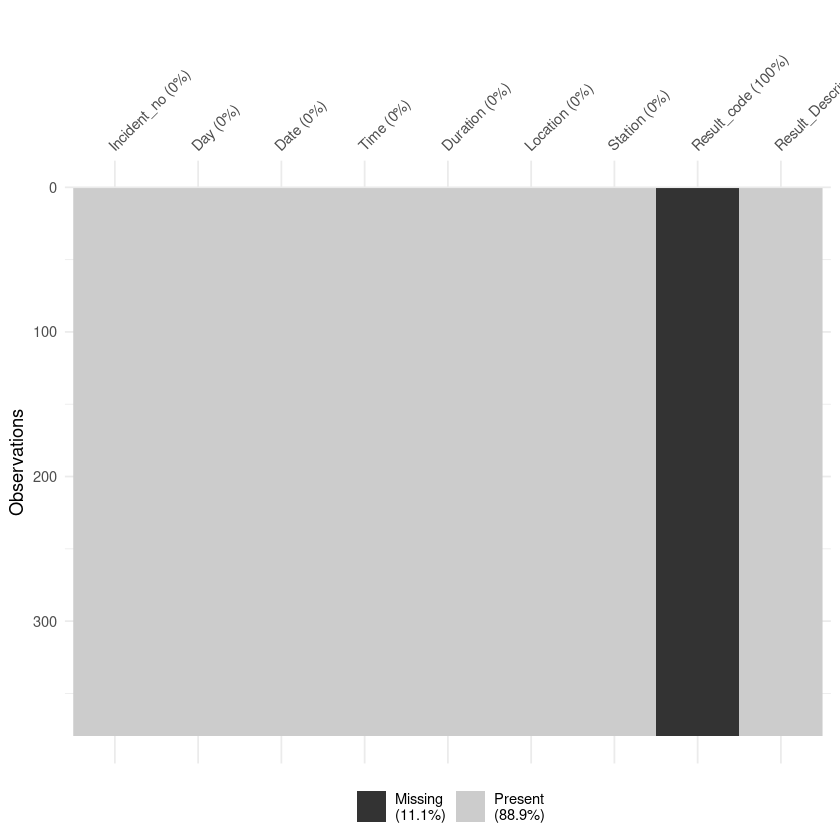

In [17]:
check_tibble <- the_tibble %>% vis_miss() # use vis_miss() function to visualize the observation with missing value
check_tibble

## Make empty string in Result Description to show NA insteas of an empty string

In [18]:
# we decide on keeping the obsevation with missing value, hence we didn't omit those observation with missing values
# here we just make sure that the missing values have value and NA instead of just an empty string
the_tibble <- mutate_all(the_tibble, list(~na_if(.,""))) 
the_tibble

Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3583940,Mon,2022-10-24,00:30:00,00:00:00,KELVIN GROVE PALMERSTON NORTH CITY,Milson,NA,NA
F3583946,Mon,2022-10-24,01:00:00,00:00:00,KELVIN GROVE PALMERSTON NORTH CITY,Palmerston North,NA,NA
F3583952,Mon,2022-10-24,01:30:00,00:00:00,SPOTSWOOD NEW PLYMOUTH DISTRICT,New Plymouth,NA,NA
F3583958,Mon,2022-10-24,01:30:00,00:00:00,ELGIN GISBORNE DISTRICT,Gisborne,NA,NA
F3583962,Mon,2022-10-24,02:00:00,00:00:00,RAUMATI BEACH KAPITI COAST DISTRICT,Paraparaumu,NA,NA
F3583970,Mon,2022-10-24,03:30:00,00:00:00,KAIRANGA MANAWATU DISTRICT,Palmerston North,NA,NA
F3583971,Mon,2022-10-24,04:00:00,00:00:00,SAINT LEONARDS HASTINGS DISTRICT,Hastings,NA,NA
F3583977,Mon,2022-10-24,05:00:00,00:00:00,OUTER KAITI GISBORNE DISTRICT,Gisborne,NA,NA
F3583983,Mon,2022-10-24,05:30:00,00:00:00,PORT TARANAKI NEW PLYMOUTH DISTRICT,New Plymouth,NA,NA


## Automate the whole things
### the goal of this function is to have on function that will call any other related function which used to produce desired data

In [19]:
#this function returns a dataframe about the fire incidents called in a week( from Monday to Sunday)
#this function take region(characters) to indicate what region we want to get the data
#1 = North, 2 = Central, 3 = South
#basically this function is combination of all codes we did above, any aditional codes are explained below
get_fire_incidents_data_in_a_week <- function(region) {
    the_tibble <- tibble(
        Incident_no = character(),
        Date_and_Time = date(),
        Location = character(),
        Duration= character(),
        Station = character(),
        Result = character()
    )
    temp <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
    for(i in temp){
        the_tibble <- rbind(the_tibble, region_incident_data(region, i))
    }

    the_tibble <- the_tibble %>% mutate(Date = date(Date_and_Time)) %>% mutate(Time = format(Date_and_Time, format = "%H:%M:%S"))
    
    
    the_tibble <- the_tibble %>% mutate(Result_code = get_result_code(Result)) %>% mutate(Result_Description = get_result_desc(Result)) %>% mutate(across(Result_Description, as.character)) %>% mutate(Day = wday(Date_and_Time, label = TRUE))
    
    the_tibble <- the_tibble %>% mutate(across(Location, str_to_title)) # make the all value in the location column not capitilize
    
    the_tibble <- the_tibble %>% mutate(across(Result_Description, str_to_title)) # make the all value in the result description column not capitilize

    the_tibble <- the_tibble %>% select(Incident_no,Day, Date, Time, Duration, Location, Station, Result_code, Result_Description)

    the_tibble <- the_tibble  %>% mutate(across(Result_code, as.integer)) %>% mutate(across(Day, as.character)) 

    the_tibble <- mutate_all(the_tibble, list(~na_if(.,"")))
    
    return(the_tibble)
}

north_region_data <- get_fire_incidents_data_in_a_week("1")
north_region_data
central_region_data <- get_fire_incidents_data_in_a_week("2")
central_region_data
south_region_data <- get_fire_incidents_data_in_a_week("3")
south_region_data

Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3583942,Mon,2022-10-24,00:30:00,00:00:00,Wattle Downs Auckland,Manurewa,NA,NA
F3583945,Mon,2022-10-24,00:30:00,00:00:00,Mangere Auckland,Mangere,NA,NA
F3583948,Mon,2022-10-24,01:00:00,00:00:00,Wellsford Auckland,Wellsford,NA,NA
F3583949,Mon,2022-10-24,01:00:00,00:00:00,New Lynn Auckland,Glen Eden,NA,NA
F3583955,Mon,2022-10-24,01:30:00,00:00:00,Matata Whakatane District,Matata,NA,NA
F3583959,Mon,2022-10-24,01:30:00,00:00:00,Taneatua Whakatane District,Edgecumbe,NA,NA
F3583961,Mon,2022-10-24,02:00:00,00:00:00,Avondale Auckland,Avondale,NA,NA
F3583965,Mon,2022-10-24,03:00:00,00:00:00,Clarks Beach Auckland,Waiau Pa,NA,NA
F3583966,Mon,2022-10-24,03:00:00,00:00:00,Auckland Central Auckland,Parnell,NA,NA


Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3583940,Mon,2022-10-24,00:30:00,00:00:00,Kelvin Grove Palmerston North City,Milson,NA,NA
F3583946,Mon,2022-10-24,01:00:00,00:00:00,Kelvin Grove Palmerston North City,Palmerston North,NA,NA
F3583952,Mon,2022-10-24,01:30:00,00:00:00,Spotswood New Plymouth District,New Plymouth,NA,NA
F3583958,Mon,2022-10-24,01:30:00,00:00:00,Elgin Gisborne District,Gisborne,NA,NA
F3583962,Mon,2022-10-24,02:00:00,00:00:00,Raumati Beach Kapiti Coast District,Paraparaumu,NA,NA
F3583970,Mon,2022-10-24,03:30:00,00:00:00,Kairanga Manawatu District,Palmerston North,NA,NA
F3583971,Mon,2022-10-24,04:00:00,00:00:00,Saint Leonards Hastings District,Hastings,NA,NA
F3583977,Mon,2022-10-24,05:00:00,00:00:00,Outer Kaiti Gisborne District,Gisborne,NA,NA
F3583983,Mon,2022-10-24,05:30:00,00:00:00,Port Taranaki New Plymouth District,New Plymouth,NA,NA


Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3583941,Mon,2022-10-24,00:30:00,00:00:00,Hinds Ashburton District,Hinds,NA,NA
F3583954,Mon,2022-10-24,01:30:00,00:00:00,Avenal Invercargill City,Invercargill,NA,NA
F3583963,Mon,2022-10-24,02:30:00,00:00:00,Otematata Waitaki District,Otematata,NA,NA
F3583964,Mon,2022-10-24,02:30:00,00:00:00,North Taieri Dunedin City,Roslyn,NA,NA
F3583969,Mon,2022-10-24,03:30:00,00:00:00,Riccarton Christchurch City,Ilam,NA,NA
F3583974,Mon,2022-10-24,04:30:00,00:00:00,Christchurch Central Christchurch City,Christchurch City,NA,NA
F3583978,Mon,2022-10-24,05:00:00,00:00:00,Mataura Island Southland District,Edendale,NA,NA
F3583980,Mon,2022-10-24,05:00:00,00:00:00,Kairaki Waimakariri District,Pines Beach,NA,NA
F3583981,Mon,2022-10-24,05:30:00,00:00:00,Clandeboye Timaru District,Temuka,NA,NA


In [20]:
wellington_fire_data <- central_region_data %>%
                                filter(grepl('Wellington', Location)) # here we filter the central region data to only show observation in Wellington City
christchurch_fire_data <- south_region_data %>%
                                filter(grepl('Christchurch', Location)) # here we filter the central region data to only show observation in Wellington City
auckland_fire_data <- north_region_data %>%
                                filter(grepl('Auckland', Location)) # here we filter the central region data to only show observation in Wellington City

In [24]:
wellington_fire_data %>%
        write_csv('wellington_fire.csv') # then we write the data frame into new csv file
christchurch_fire_data %>%
        write_csv('christchurch_fire.csv') # then we write the data frame into new csv file
auckland_fire_data %>%
        write_csv('auckland_fire.csv') # then we write the data frame into new csv file